In [114]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score,recall_score,f1_score

In [116]:
#Load Data

data=pd.read_csv("Churn_Modelling.csv",sep=",")

In [117]:
#get informations about the dataset

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [118]:
print("Dataset:")
data.head()

Dataset:


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [119]:
#check nul values in the dataset
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [120]:
# Drop unnecessary columns

data = data.drop(columns=['RowNumber','CustomerId','Surname'],axis=1)
print("Dataset:")
data.head()

Dataset:


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [121]:
#Encode categorical columns:Gender,Geography

label_encoder = LabelEncoder()
data['Gender'] = label_encoder.fit_transform(data['Gender'])
data['Geography'] = label_encoder.fit_transform(data['Geography'])

print("Dataset:")
data.head()

Dataset:


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0


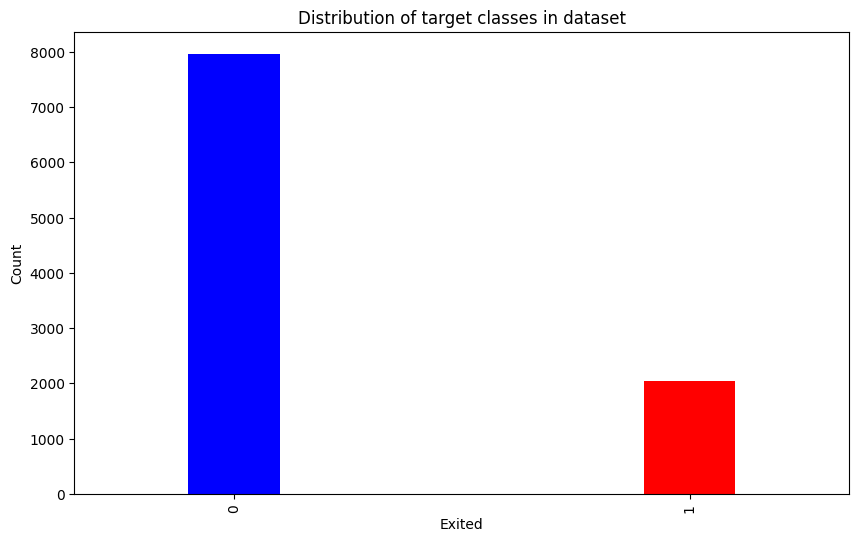

In [122]:
# Visualize Data - Distribution of  target classes in  Dataset

plt.figure(figsize=(10, 6))
data['Exited'].value_counts().plot(kind='bar', color=['blue','red'],width=0.2)
plt.title('Distribution of target classes in dataset')
plt.xlabel('Exited')
plt.ylabel('Count')
plt.show()

 imbalanced class distribution

In [124]:
#separating features and targets

#features
X=data.drop('Exited',axis=1)
#targets
Y=data['Exited']

In [125]:
#use over_sampling to balance the class distribution
X,Y=SMOTE().fit_resample(X,Y)

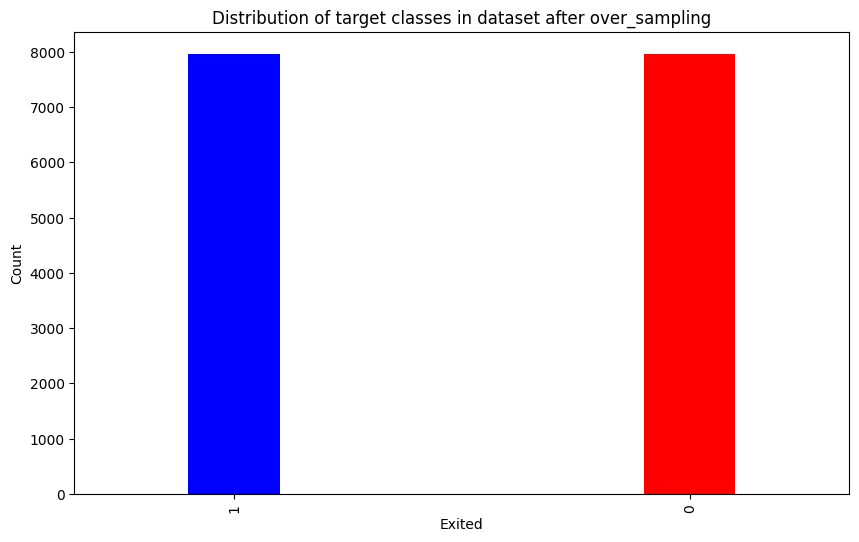

In [126]:
# Visualize Data - Distribution of  target classes in  Dataset afer over_sampling

plt.figure(figsize=(10, 6))
Y.value_counts().plot(kind='bar', color=['blue','red'],width=0.2)
plt.title('Distribution of target classes in dataset after over_sampling')
plt.xlabel('Exited')
plt.ylabel('Count')
plt.show()

now we have balanced dataset


In [127]:
#split the dataset into traninnig and test datasets
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [128]:
# Create a StandardScaler object
scaler = StandardScaler()

#features scaling
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)


In [129]:
print("Trainning data after scaling:")
print(X_train)

Trainning data after scaling:
[[-0.04841913  0.43750943 -0.83966191 ... -1.2822834   1.31167005
  -0.5812794 ]
 [ 1.10074389 -0.88456604  1.19095554 ... -1.2822834   1.31167005
   0.74777074]
 [-0.51902875 -0.88456604 -0.83966191 ... -1.2822834  -0.76238685
  -0.70067295]
 ...
 [ 0.20330229 -0.88456604  1.19095554 ...  0.7798588  -0.76238685
  -0.05199982]
 [-0.16880764  0.43750943 -0.83966191 ...  0.7798588  -0.76238685
   0.70730463]
 [ 0.53163458  0.43750943  1.19095554 ...  0.7798588   1.31167005
  -0.81522125]]


In [130]:
#Logistic Regression model

model=LogisticRegression()
model.fit(X_train,Y_train)


LogisticRegression()

In [131]:
# Make predictions

predictions = model.predict(X_test)

# Evaluate the model
print('Logistic Regression model:')
accuracy = accuracy_score(Y_test, predictions)
precision=precision_score(Y_test, predictions)
recall=recall_score(Y_test, predictions)
f1=f1_score(Y_test, predictions)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1:", f1)

Logistic Regression model:
Accuracy: 0.7740112994350282
Precision: 0.7541183648566199
Recall: 0.7958789439793947
F1: 0.7744360902255639


In [132]:
#SVC model
from sklearn import svm
svm_model=svm.SVC()
svm_model.fit(X_train,Y_train)

SVC()

In [133]:
# Make predictions

svm_predictions = svm_model.predict(X_test)

# Evaluate the model
print('SVC model:')
svm_accuracy = accuracy_score(Y_test, svm_predictions)
svm_precision=precision_score(Y_test, svm_predictions)
svm_recall=recall_score(Y_test, svm_predictions)
svm_f1=f1_score(Y_test, svm_predictions)
print("Accuracy:", svm_accuracy)
print("Precision:", svm_precision)
print("Recall:", svm_recall)
print("F1:", svm_f1)

SVC model:
Accuracy: 0.8405524168236033
Precision: 0.8334396936821953
Recall: 0.840952994204765
F1: 0.8371794871794872


In [134]:
df_models=pd.DataFrame({'Models':['Logistic Regression','SVC'],'Accuracy':[accuracy,svm_accuracy]})
df_models

,Models,Accuracy
0,Logistic Regression,0.774011
1,SVC,0.840552


Text(0.5, 1.0, 'Models Accuracies')

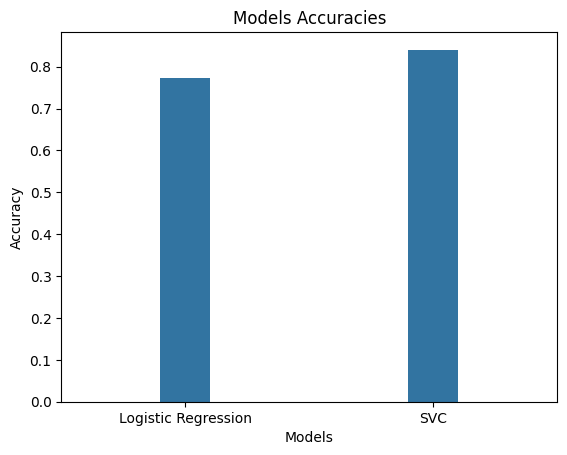

In [135]:
#compare the performance of the two models
sns.barplot(x='Models',y='Accuracy',width=0.2,data=df_models)
plt.title("Models Accuracies")